# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren gleichzeitig

In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


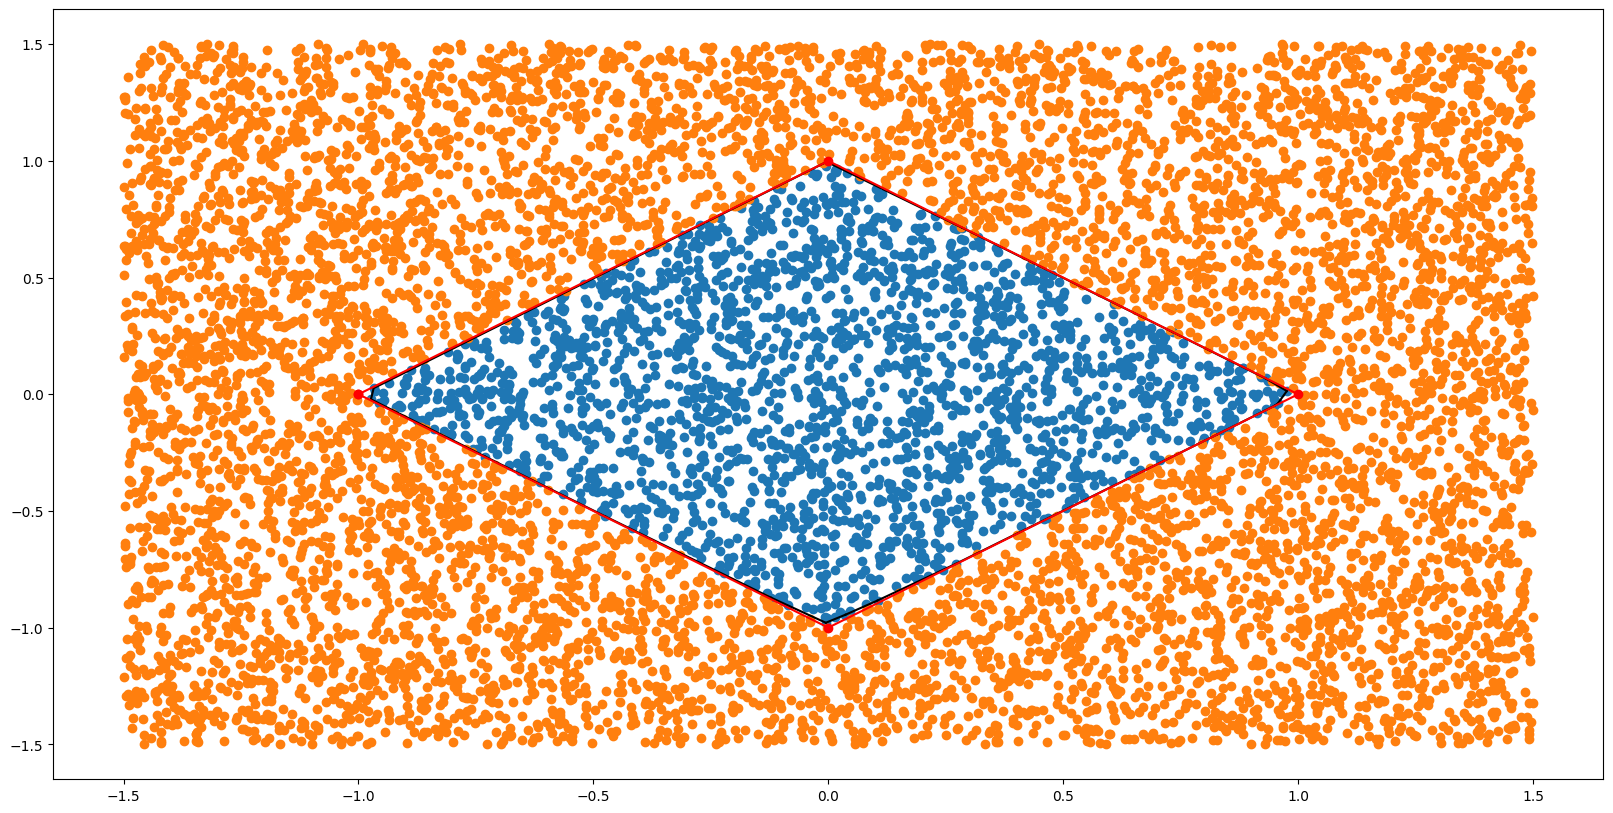

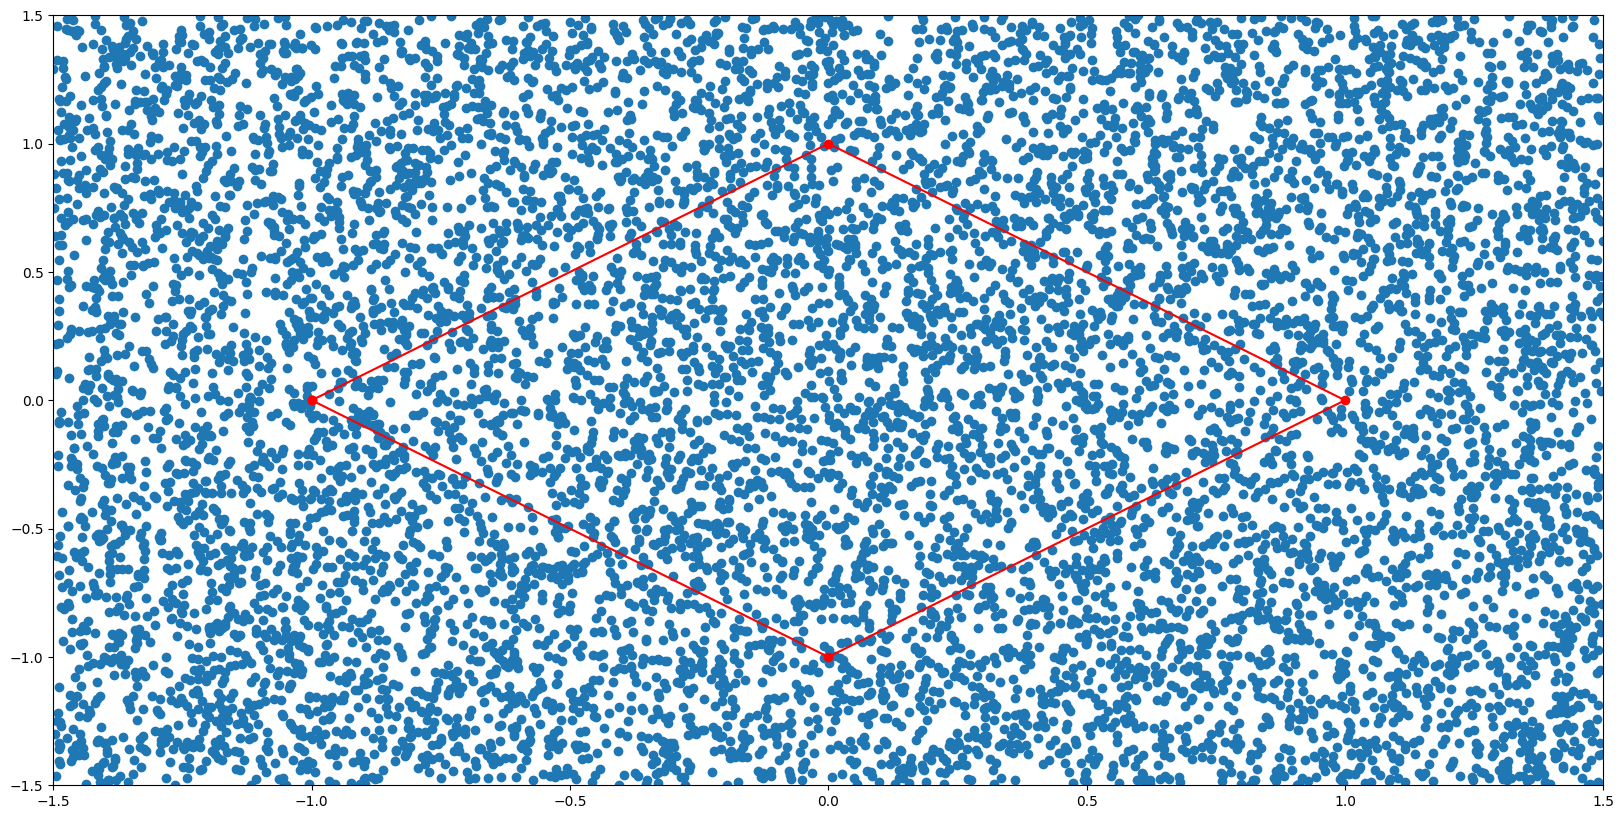

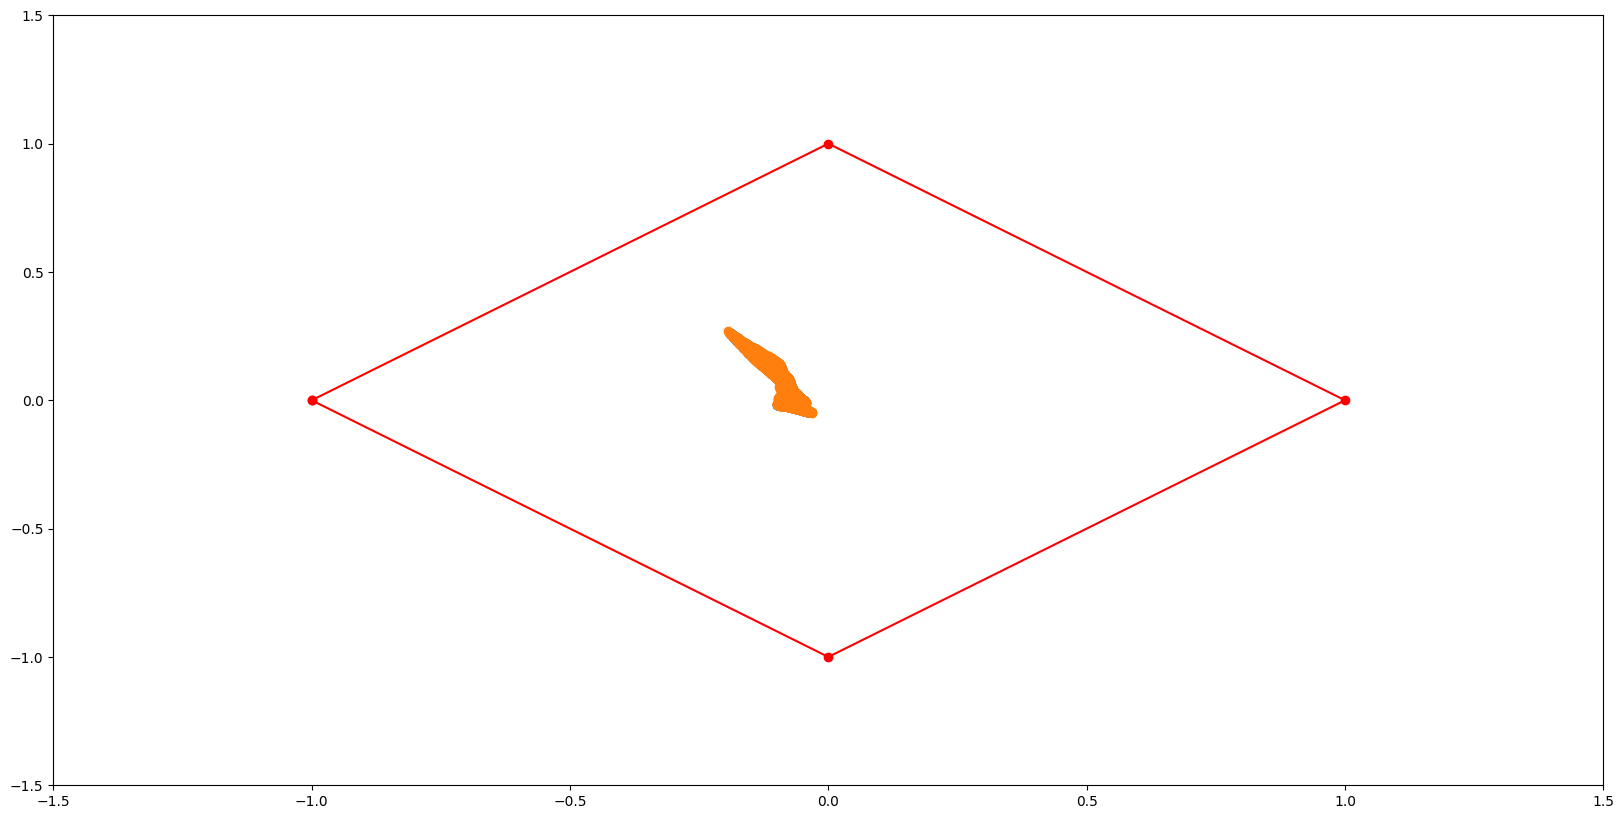

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, x_range, y_range, extr=true_extremal_points, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [6]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.9923294815605166, l_pos = 0.8632843716058533, l_neg = 0.5549361203649106, l_gen = 0.5741089895897528
batch = 100, mean loss = 1.9531478090230663, l_pos = 0.811421272527491, l_neg = 0.5838330009234635, l_gen = 0.557893535572113
batch = 200, mean loss = 1.8824178551547974, l_pos = 0.7719677580297927, l_neg = 0.49057231871970747, l_gen = 0.6198777784052987
batch = 225, mean loss = 1.8628529322770753, l_pos = 0.762959577412271, l_neg = 0.4523824832264025, l_gen = 0.6475108716384032
=== Epoch: 1===
batch = 0, mean loss = 1.7136942318688577, l_pos = 0.7017160322039752, l_neg = 0.13593437781077589, l_gen = 0.8760438218541067
batch = 100, mean loss = 1.65710956057098, l_pos = 0.652944612004727, l_neg = 0.07595976523485908, l_gen = 0.9282051833313942
batch = 200, mean loss = 1.6281344189543876, l_pos = 0.625540829769346, l_neg = 0.05672408043150256, l_gen = 0.945869508753539
batch = 225, mean loss = 1.6219461714603054, l_pos = 0.6195714498753861, l_neg =

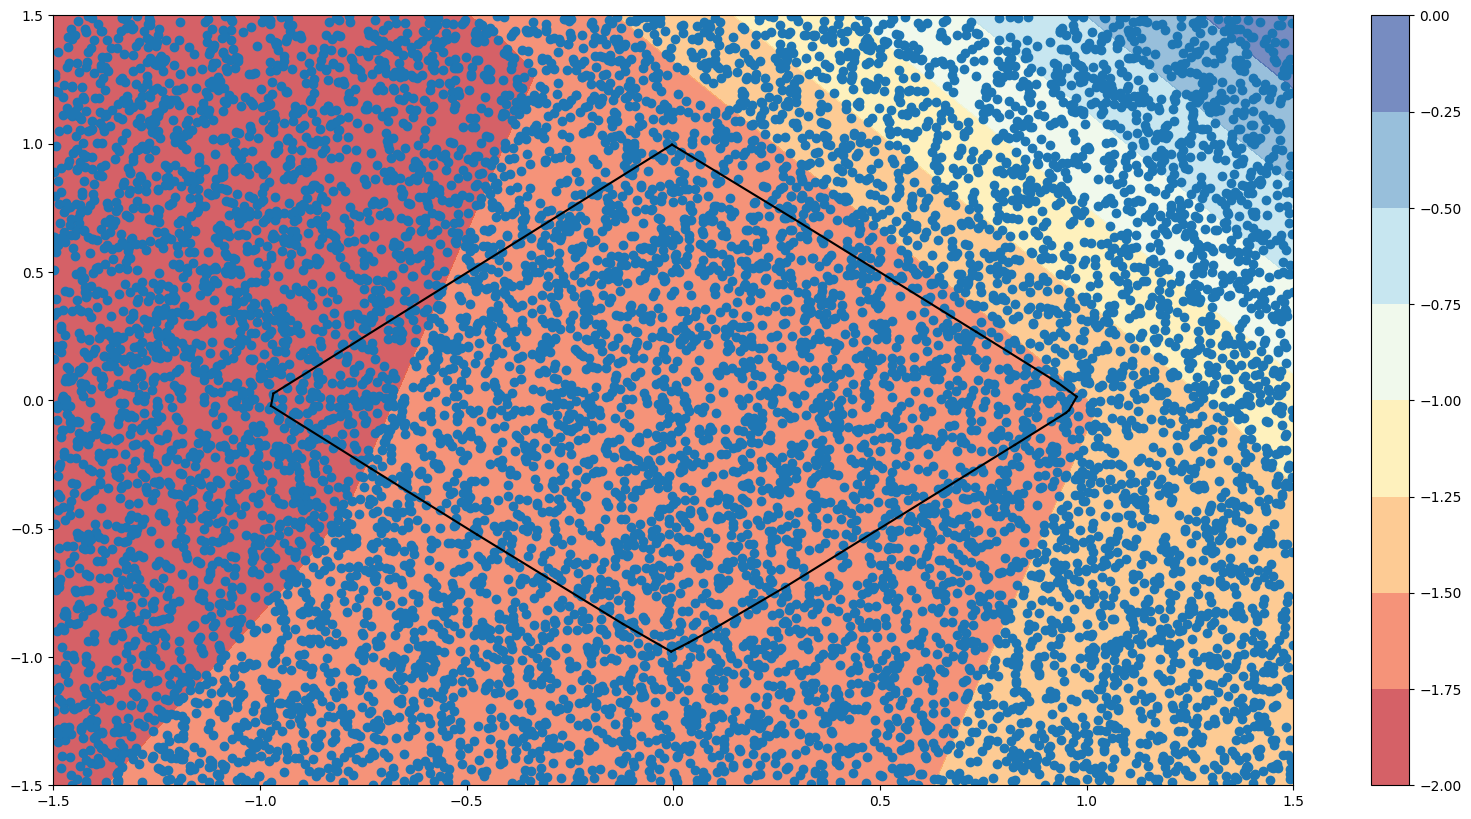

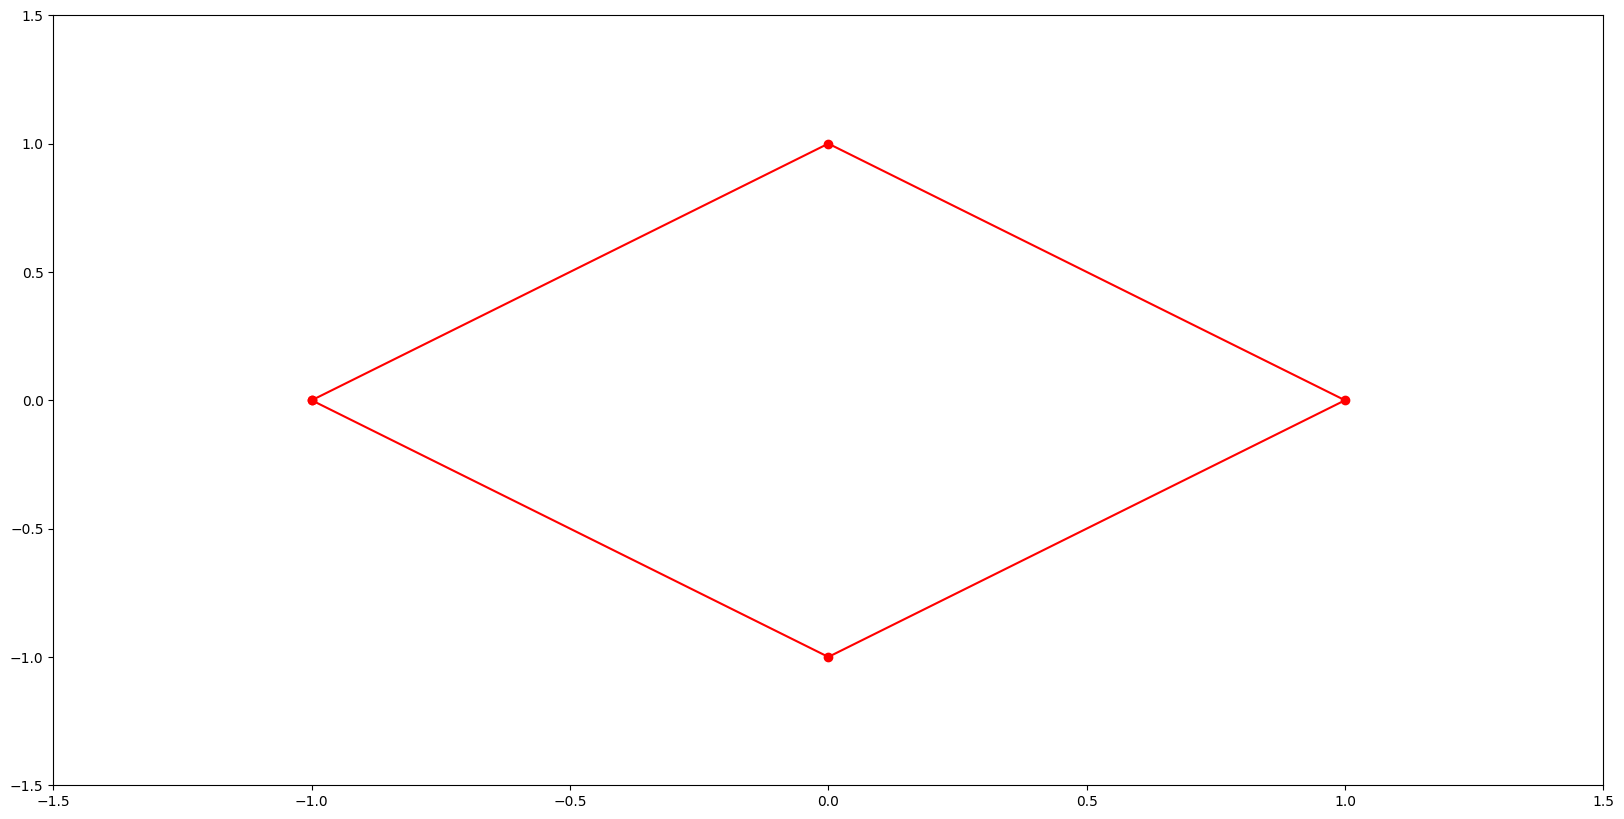

In [7]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [8]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A_b=[A,b], sequential=False)

TypeError: verification() got an unexpected keyword argument 'A_b'

In [9]:
input_data, plots.c = result
plots.plt_mesh()

NameError: name 'result' is not defined